In [2]:
!pip install tensorflow numpy pandas matplotlib seaborn scikit-learn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# Data evaluasi pelayanan rumah sakit
positive_texts = [
    "Pelayanan di rumah sakit ini sangat memuaskan.",
    "Dokter dan perawat sangat ramah dan profesional.",
    "Fasilitas yang disediakan sangat lengkap dan nyaman.",
    "Saya merasa sangat diperhatikan selama dirawat di sini.",
    "Waktu tunggu untuk mendapatkan perawatan sangat singkat.",
    "Obat-obatan yang diberikan sangat efektif.",
    "Proses administrasi sangat cepat dan efisien.",
    "Ruangan sangat bersih dan terawat dengan baik.",
    "Sangat puas dengan pelayanan yang diberikan.",
    "Staff rumah sakit sangat membantu dan informatif."
]

negative_texts = [
    "Pelayanan di rumah sakit ini sangat buruk.",
    "Dokter dan perawat kurang ramah dan tidak profesional.",
    "Fasilitas yang disediakan sangat minim dan tidak nyaman.",
    "Saya merasa tidak diperhatikan selama dirawat di sini.",
    "Waktu tunggu untuk mendapatkan perawatan sangat lama.",
    "Obat-obatan yang diberikan tidak efektif.",
    "Proses administrasi sangat lambat dan membingungkan.",
    "Ruangan sangat kotor dan tidak terawat.",
    "Sangat kecewa dengan pelayanan yang diberikan.",
    "Staff rumah sakit kurang membantu dan tidak informatif."
]

texts = positive_texts + negative_texts
labels = np.array([1] * len(positive_texts) + [0] * len(negative_texts))


In [5]:
# Tokenisasi teks
max_words = 2000  # Jumlah kata maksimum yang akan dijadikan token
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [6]:
# Padding sequence agar memiliki panjang yang sama
maxlen = 50  # Panjang sequence
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

In [7]:
# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [8]:
# Membangun model CNN dengan lapisan tambahan dan dropout
embedding_dim = 100
filters = 128
kernel_size = 5

model = Sequential([
    Embedding(max_words, embedding_dim, input_length=maxlen),
    SpatialDropout1D(0.2),
    Conv1D(filters, kernel_size, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [9]:
# Melatih model
batch_size = 32
epochs = 20  # Jumlah epoch
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))


Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.7010 - accuracy: 0.3750 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/20
1/1 [==============================] - 0s 198ms/step - loss: 0.6946 - accuracy: 0.3750 - val_loss: 0.6981 - val_accuracy: 0.2500
Epoch 3/20
1/1 [==============================] - 0s 191ms/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.7032 - val_accuracy: 0.2500
Epoch 4/20
1/1 [==============================] - 0s 242ms/step - loss: 0.6885 - accuracy: 0.5000 - val_loss: 0.7062 - val_accuracy: 0.2500
Epoch 5/20
1/1 [==============================] - 0s 149ms/step - loss: 0.6859 - accuracy: 0.6250 - val_loss: 0.7094 - val_accuracy: 0.2500
Epoch 6/20
1/1 [==============================] - 0s 184ms/step - loss: 0.6845 - accuracy: 0.5625 - val_loss: 0.7135 - val_accuracy: 0.2500
Epoch 7/20
1/1 [==============================] - 0s 178ms/step - loss: 0.6799 - accuracy: 0.6875 - val_loss: 0.7174 - val_accuracy: 0.2500
Epoch 8/20
1/1 [=======

In [10]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

1/1 [==============================] - 0s 82ms/step - loss: 0.7974 - accuracy: 0.0000e+00
Loss: 0.797412097454071, Accuracy: 0.0


In [11]:
# Prediksi
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

1/1 [==============================] - 0s 240ms/step


In [12]:
# Laporan klasifikasi
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       2.0
    Positive       0.00      0.00      0.00       2.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



In [13]:
# Plot loss dan accuracy
plt.figure(figsize=(10, 4))


<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

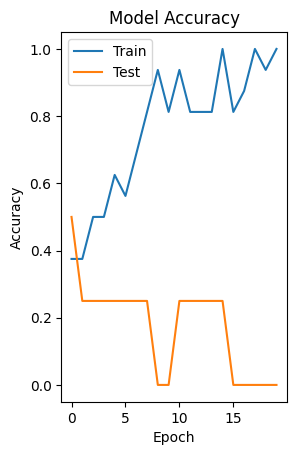

In [14]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


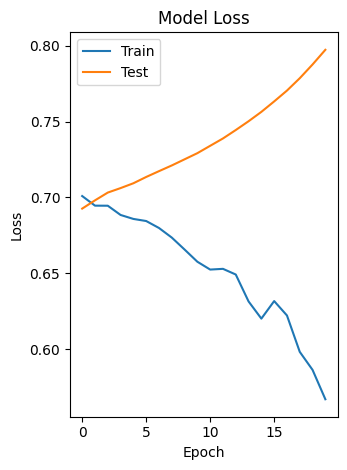

In [15]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


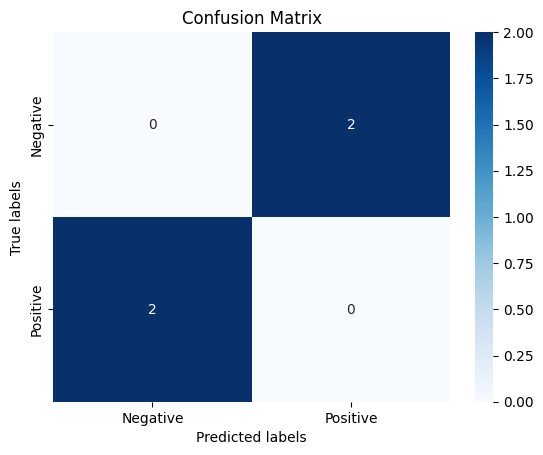

In [16]:
# Heatmap confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
